<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/12_confidence_intervals__meanspower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as sts
import seaborn as sns
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('dark_background')

(-1.959963984540054, 1.959963984540054)

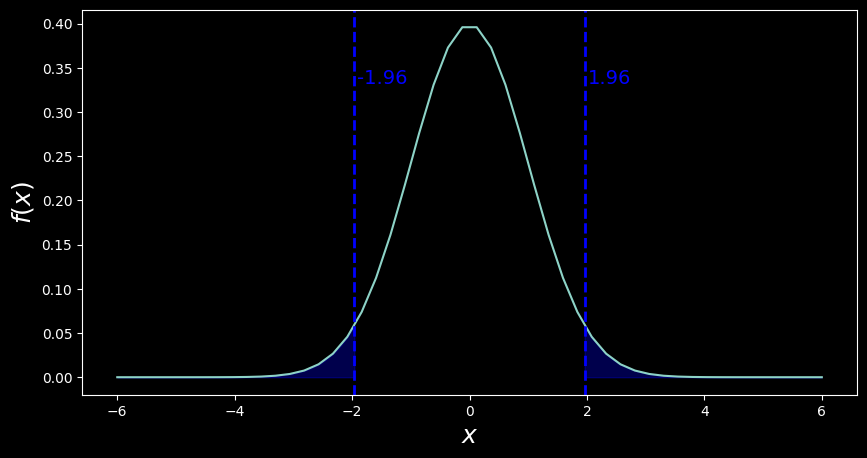

In [8]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=6):
    """
        Constructs a (1-alpha)*100% asymptotically normal confidence interval
    """

    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sts.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

norm_conf_int(alpha=0.05)

In [25]:
x = [2,3,0,0,1,1,4,3,5,2,2,4,2,1,2,3,1,3,6,7,1,0,4,8,6,2,3,4,10,4,6,4,6,4,8,2,6,1,3,3,1,7,2,0,4,5,0]  # weekly conversions
lam_hat = np.mean(x)  # sample parameter estimation
lam_se = np.sqrt(lam_hat/len(x))  # standard deviation estimation

sts.norm.interval(0.95, loc=lam_hat, scale=lam_se)

# the same as
#norm_rv = sts.norm(loc=0, scale=1)

#alpha = 0.05                       # significance level
#z_alpha = norm_rv.ppf(1 - alpha/2) # quantile

#lam_hat = np.mean(x)               # sample parameter estimation
#lam_se = np.sqrt(lam_hat/len(x))   # standard deviation estimation

# borders
#lam_left = lam_hat - z_alpha*lam_se
#lam_right = lam_hat + z_alpha*lam_se

#print(f"confidence interval [{lam_left:.3}, {lam_right:.3}] length { lam_right - lam_left:.3}")

(2.79829909955806, 3.8399987727823652)

(2.79829909955806, 3.8399987727823652)

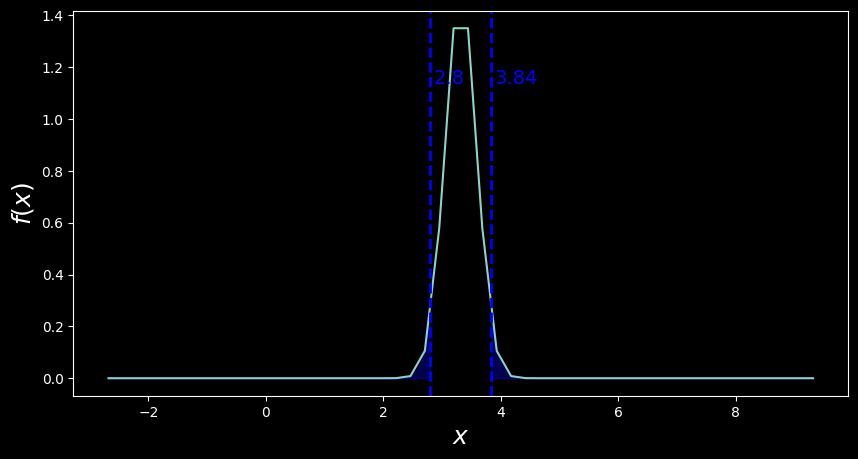

In [28]:
norm_conf_int(alpha=0.05, mean_hat=lam_hat, std_hat=lam_se)

In [35]:
x = [2,3,0,0,1,1,4,3,5,2,2,4,2,1,2,3,1,3,6,7,1,0,4,8,6,2,3,4,10,4,6,4,6,4,8,2,6,1,3,3,1,7,2,0,4,5,0]  # weekly conversions campaign 1
#y = [2,3,0,0,1,1,4,3,5,2,2,4,2,1,2+1,3,1,3,6+1,7,1,0,4,8,6,2+1,3,4,10,4,6+1,4,6,4+1,8,2,6+1,1,3,3,1,7,2,0+1,4,5,0]  # weekly conversions campaign 2
y = [i+1 for i in x]  # weekly conversions campaign 2

diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))
sts.norm.interval(0.95, loc=diff, scale=diff_se)

(-1.7901280092463243, -0.20987199075367569)

(-1.7901280092463243, -0.20987199075367569)

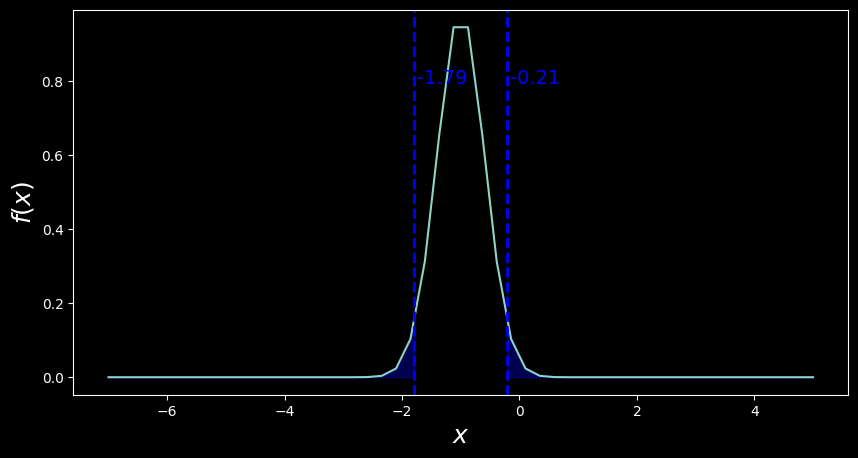

In [36]:
norm_conf_int(alpha=0.05, mean_hat=diff, std_hat=diff_se)